### Keras를 이용한 CNN 구현 - CIFAR10

### 데이터 로드

In [2]:
from keras.datasets import cifar10

(X_train, y_train0), (X_test, y_test0) = cifar10.load_data()
print(X_train.shape, X_train.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test.shape, X_test.dtype)
print(y_test0.shape, y_test0.dtype)

(50000, 32, 32, 3) uint8
(50000, 1) uint8
(10000, 32, 32, 3) uint8
(10000, 1) int64


### 데이터 확인

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)
fm._rebuild()

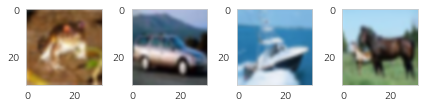

In [4]:
plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation='bicubic')
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation='bicubic')
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation='bicubic')
plt.grid(False)

plt.tight_layout()
plt.show()

### 자료 변형 및 스케일링

In [5]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
print(X_train.shape, X_train.dtype)
print(X_test.shape, X_test.dtype)

(50000, 32, 32, 3) float32
(10000, 32, 32, 3) float32


In [6]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
print(Y_train.shape)
print(Y_test.shape)

(50000, 10)
(10000, 10)


In [7]:
Y_train[:4]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### 모형 구현

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.regularizers import l2
import tensorflow as tf

np.random.seed(0)

model = Sequential()

# conv layer 1 and pooling layer 1  
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding="SAME", kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=[2, 2], padding='SAME', strides=2))
model.add(Dropout(rate=0.3))

# conv layer 2 and pooling layer 2, 
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu, padding='SAME', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=[2, 2], padding='SAME', strides=2))
model.add(Dropout(rate=0.3))

# conv layer 3 and pooling layer 3, 
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation=tf.nn.relu, padding='SAME', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=[2, 2], padding='SAME', strides=2))
model.add(Dropout(rate=0.3))

# Dense layer 4 with Relu
model.add(Flatten())
model.add(Dense(units=625, activation=tf.nn.relu, kernel_regularizer=l2(0.001)))
model.add(Dropout(rate=0.5))

# Dense layer 5 with softmax
model.add(Dense(units=10, activation=tf.nn.softmax))

In [11]:
# define cost / accuracy
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)        

### Train the model

In [13]:
%%time
hist = model.fit(X_train, Y_train, epochs=50, batch_size=100, validation_data=(X_test, Y_test), verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 146s - loss: 2.0248 - acc: 0.3597 - val_loss: 1.6028 - val_acc: 0.4953
Epoch 2/50
 - 143s - loss: 1.5981 - acc: 0.4931 - val_loss: 1.4931 - val_acc: 0.5304
Epoch 3/50
 - 137s - loss: 1.4921 - acc: 0.5417 - val_loss: 1.3788 - val_acc: 0.5842
Epoch 4/50
 - 161s - loss: 1.4243 - acc: 0.5801 - val_loss: 1.2929 - val_acc: 0.6413
Epoch 5/50
 - 152s - loss: 1.3768 - acc: 0.6037 - val_loss: 1.2592 - val_acc: 0.6506
Epoch 6/50
 - 150s - loss: 1.3410 - acc: 0.6185 - val_loss: 1.2071 - val_acc: 0.6642
Epoch 7/50
 - 165s - loss: 1.3189 - acc: 0.6261 - val_loss: 1.2453 - val_acc: 0.6636
Epoch 8/50
 - 146s - loss: 1.2912 - acc: 0.6424 - val_loss: 1.1620 - val_acc: 0.6953
Epoch 9/50
 - 137s - loss: 1.2660 - acc: 0.6537 - val_loss: 1.1238 - val_acc: 0.7065
Epoch 10/50
 - 146s - loss: 1.2587 - acc: 0.6571 - val_loss: 1.1405 - val_acc: 0.7033
Epoch 11/50
 - 140s - loss: 1.2475 - acc: 0.6621 - 